In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import sklearn.tree as st
import sklearn.ensemble as se
import sklearn.datasets as sd
import sklearn.utils as su
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split

In [3]:
boston = sd.load_boston()

In [4]:
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [9]:
data = pd.DataFrame(X, columns=boston.feature_names)
data['target'] = y
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
model = st.DecisionTreeRegressor(max_depth=5)
model = se.AdaBoostRegressor(model, n_estimators=400, random_state=7)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(sm.r2_score(y_test, predictions))

0.8640058601935986


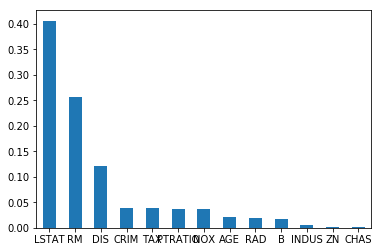

In [18]:
fi = model.feature_importances_
fi = pd.Series(fi, index=boston.feature_names)
fi.sort_values(ascending=False).plot.bar(rot=0)

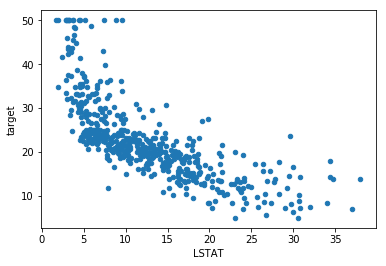

In [10]:
data.plot.scatter(x='LSTAT', y='target')